In [120]:
## 추린 칼럼의 임의의 샘플에 대해 JSON → 그 예측모델에 넣어서 모델이 말하는 값을 도출하는 코드 fit 상태의 모델
## input : json 형태의 환자 데이터
## output : HE_DM 예측값 1, 2, 3
## 함수로 나누긴 나눴는데 저번주에 샘플 뽑을 때 실제 HE_DM값을 빼고 샘플을 뽑아서 
## 지금 샘플로는 어떤 오류 형태인지 파악을 할 수가 없네여,,
## 조금만 자고 일어나서 다시할게욥🙏🙏

In [121]:
# import
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize

In [122]:
def decision(file):
    with open(file, "r", encoding="utf-8") as f:
        data = json.load(f)
    
    sample = json_normalize(data)
    
    sampleID = sample.patientID ## json 데이터에 환자별로 넘버링이 되어있다고 가정
    sample = sample.drop(columns=["patientID"])
    
    pred = pipe.predict(sample)
    pred = pd.DataFrame(pred, columns=['HE_DM'])
    
    pred = pd.concat((sampleID, pred), axis =1)
    print(pred)
    
    # json파일로 내보내기
    pred = pred.to_json('pred.json', orient='records')

In [123]:
decision("sample.json")

    patientID  HE_DM
0        4361      1
1        6707      3
2        2007      1
3        4383      1
4        6155      2
5        6910      3
6        2455      2
7        2121      3
8        1718      2
9        2347      1
10        500      1
11       7691      3
12       6523      2
13       4163      1
14       2173      1
15       6917      1
16       4319      1
17       1992      1
18       4594      1
19       1441      1


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


In [124]:
df = pd.read_csv("2018_SEL_FILLED.csv") ## file reading
df = df.dropna(axis=0)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4588 entries, 0 to 4587
Columns: 165 entries, patientID to HEI_BR
dtypes: float64(116), int64(49)
memory usage: 5.8 MB


In [125]:
df = df.astype({'HE_DM' : 'int'})
x = df.drop(columns=["HE_DM", "patientID"])
y = df.HE_DM

0.7864923747276689


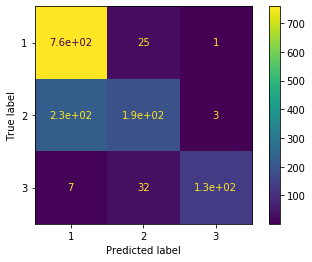

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipe.fit(x_train,y_train)
pred=pipe.predict(x_test)
print(pipe.score(x_test,y_test))
plot_confusion_matrix(pipe,x_test,y_test)

In [127]:
decision("sample.json")

    patientID  HE_DM
0        4361      1
1        6707      3
2        2007      1
3        4383      1
4        6155      2
5        6910      3
6        2455      2
7        2121      3
8        1718      2
9        2347      1
10        500      1
11       7691      3
12       6523      2
13       4163      1
14       2173      1
15       6917      1
16       4319      1
17       1992      1
18       4594      1
19       1441      1


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """
